In [25]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("data/WineQT.csv", header = 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Understanding the Data and Determining if we need cleaning

Understanding the Columns:
1. **Fixed Acidity**: Total concentration of non-volatile acids. It contributes to the wine's taste, structure, and stability. The presence of fixed acidity provides a refreshing tartness and helps in balancing the wine's flavor profile, making it an important component for overall taste and aging potential.

2. **Volatile Acidity**: a measure of the wine's volatile (or gaseous) acids. The amount of VA in wine is often considered an indicator of spoilage. Small amounts of volatile acidity can contribute to the wine's complexity, excessive levels can lead to undesirable vinegar-like aromas and flavors. Controlling volatile acidity is crucial in maintaining the wine's quality and preventing off-flavors.

3. **Citric Acid**: Natural acid from grapes. Contributes to wine's freshness and fruitiness. Excessive levels can lead to sour or overly acidic taste.

4. **Residual Sugar**: Natural sugar remaining after fermentation. It can contribute to the wine's sweetness, body, and mouthfeel. Wines with higher residual sugar levels tend to have a sweeter taste, while those with lower levels are drier.

5. **Chlorides**: Originate from soil and winemaking process. Small amounts can contribute to the wine's complexity, excessive levels can lead to salty or briny taste, negatively affecting the overall flavor profile. 

6. **Free Sulfur Dioxide**: used in minemaking as a preservative to prevent oxidation and microbial spoilage. Plays a crucial role in maintaining the wine's freshness, stability, and aging potential. Proper levels of free sulfur dioxide are essential for ensuring the wine's longevity and quality.

7. **Total Sulfur Dioxide**: It serves as a preservative and antioxidant, protecting the wine from spoilage and oxidation. Monitoring total sulfur dioxide levels is important for ensuring the wine's shelf life and overall quality.

8. **Density**: can provide insights into the wine's alcohol content and potential sweetness. It contributes to the wine's body and mouthfeel. Higher density wines often exhibit a richer and more viscous texture. 

9. **pH**: pH influences its acidity, microbial stability, and color stability. Significant role in shaping the wine's overall taste and mouthfeel. Proper pH levels are important for ensuring the wine's balance and longevity.

10. **Sulphates**: Used in winemaking as a preservative and antimicrobial agent. Help prevent oxidation and microbial spoilage, contributing to the wine's stability and longevity. Excessive levels can lead to undesirable aroma and flavors. 

11. **Alcohol**: Alcohol content on wine contributes to its body, texture, and overall flavor profile. It can influence the wine's warmth, mouthfeel, and perceived sweetness. The alcohol level is an important factor in defining the wine's style and can impact its aging potential.

12. **Quality**: OUTPUT VARIABLE; Score between 0 and 10

In [3]:
print("Shape:", df.shape)
print("--------------------------------------------------")
print("Columns:")
print(df.columns)
print("--------------------------------------------------")
print("NULL information:\n")
print(df.isnull().sum())
print("--------------------------------------------------")
print("Info:\n")
print(df.info)

Shape: (1143, 13)
--------------------------------------------------
Columns:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
--------------------------------------------------
NULL information:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
--------------------------------------------------
Info:

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
# DROP column Id
df.drop(['Id'], axis = 1, inplace = True)

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Understanding the Data - Visualizations

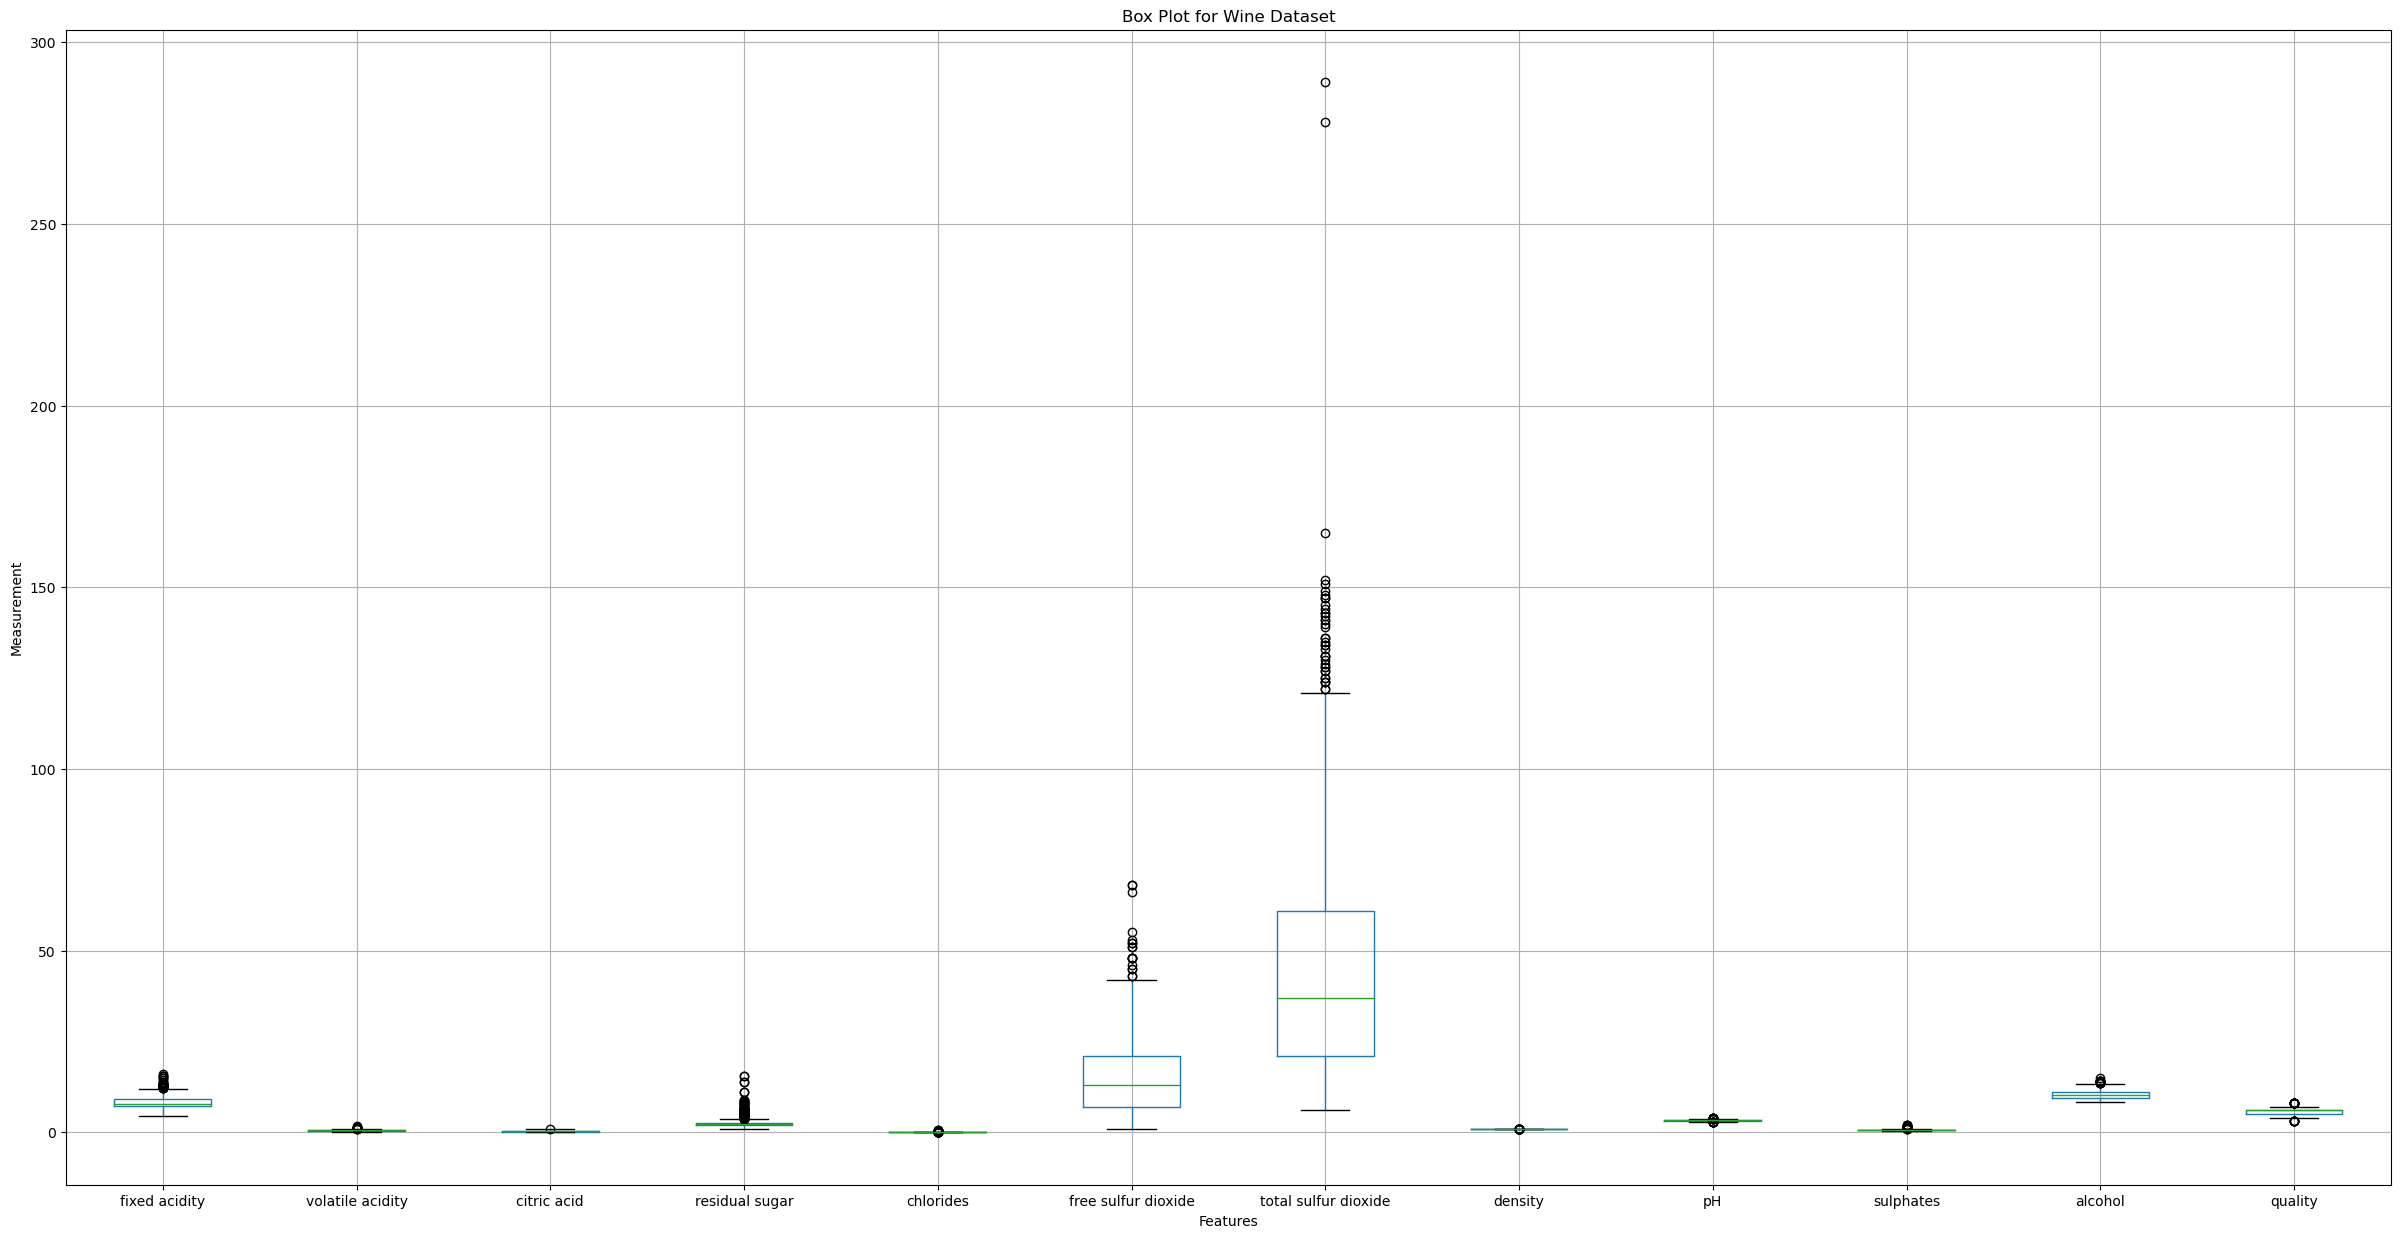

In [8]:
# examine any outliers
plt.figure(figsize=(30, 15))
df.boxplot()

plt.title('Box Plot for Wine Dataset')
plt.xlabel('Features')
plt.ylabel('Measurement')

plt.show()

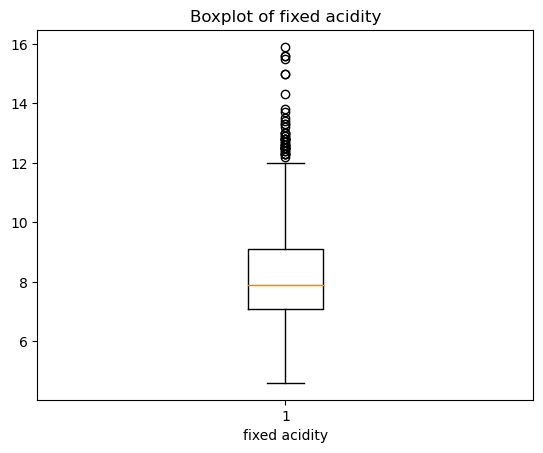

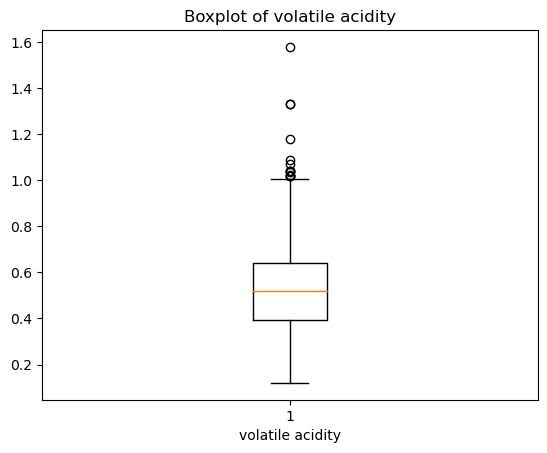

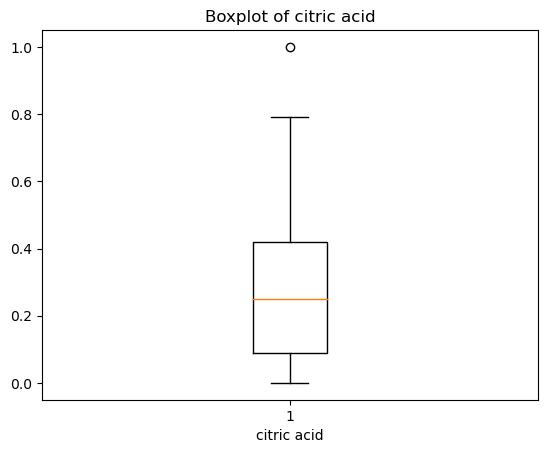

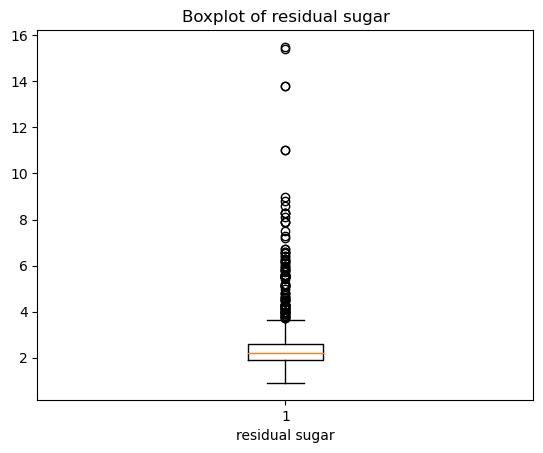

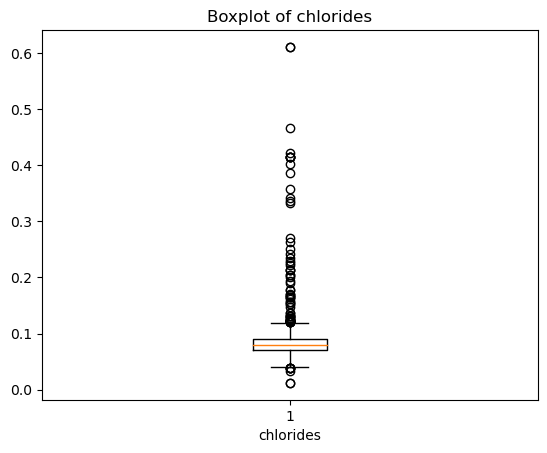

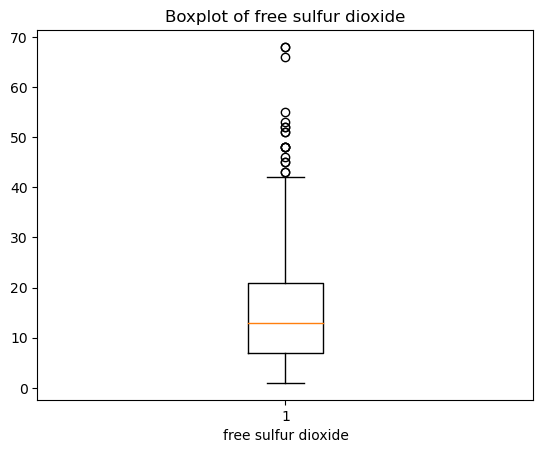

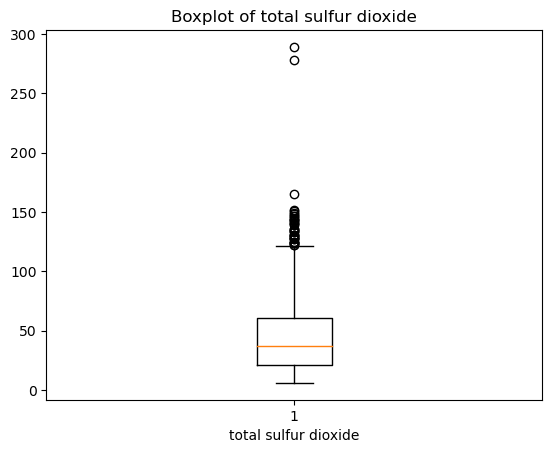

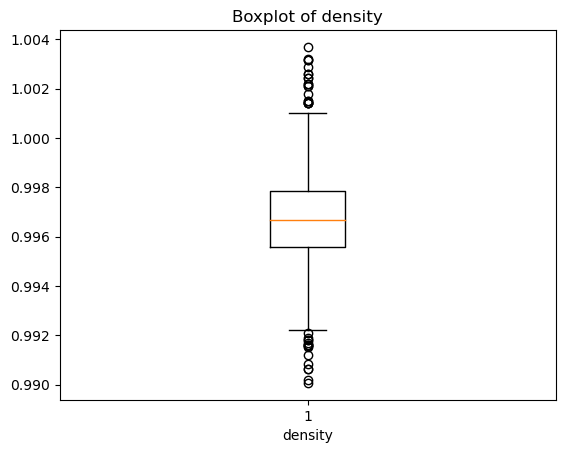

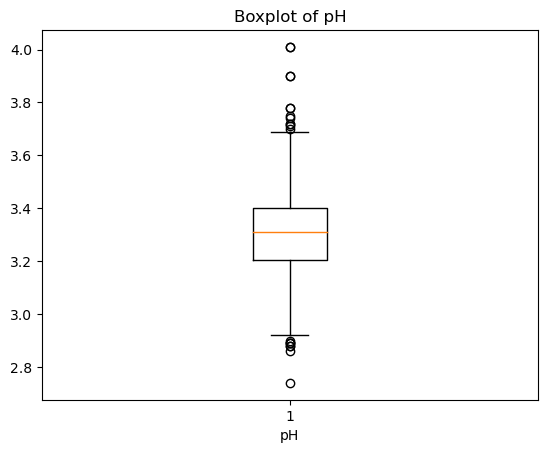

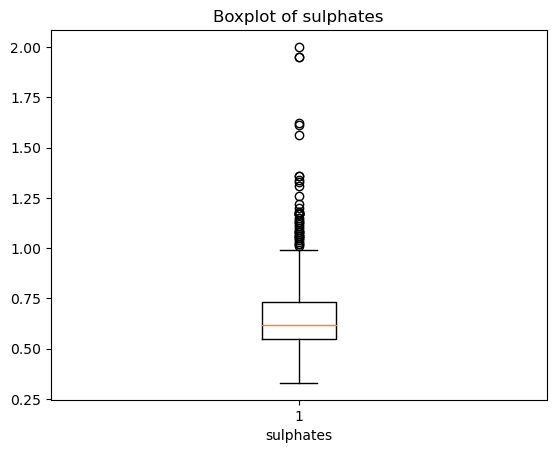

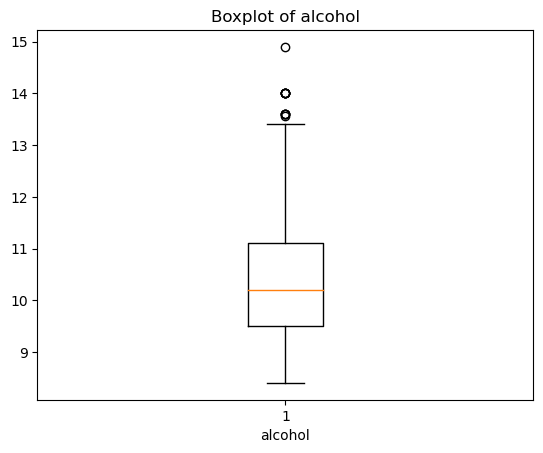

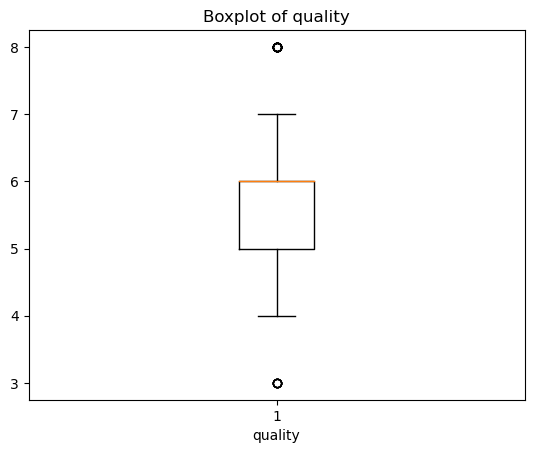

In [9]:
def plt_boxplots(df):
    for col in df.columns:
        plt.figure()
        plt.boxplot(df[col])
        
        plt.xlabel(f'{col}')
        plt.title(f'Boxplot of {col}')
        
        plt.show()
        
        
plt_boxplots(df)

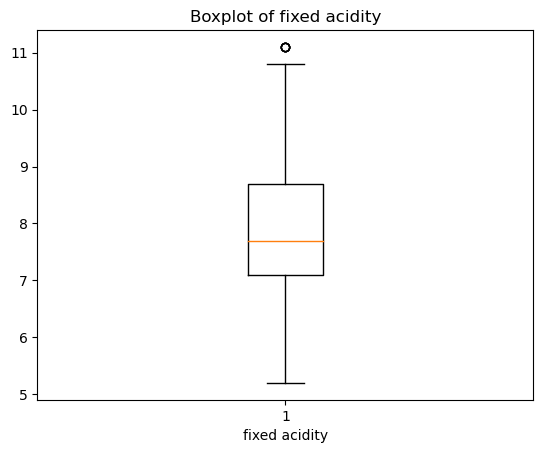

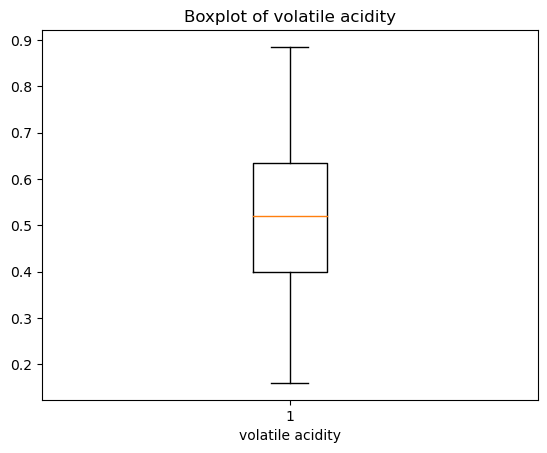

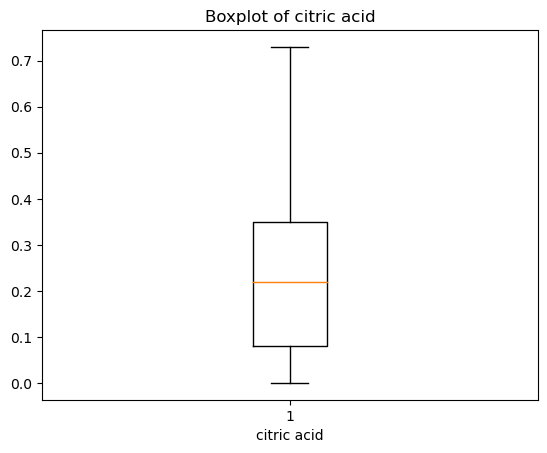

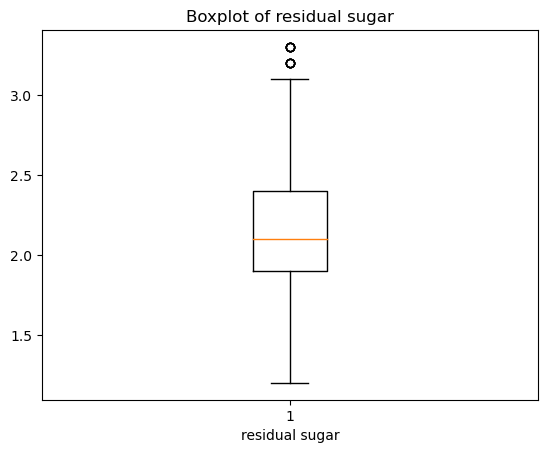

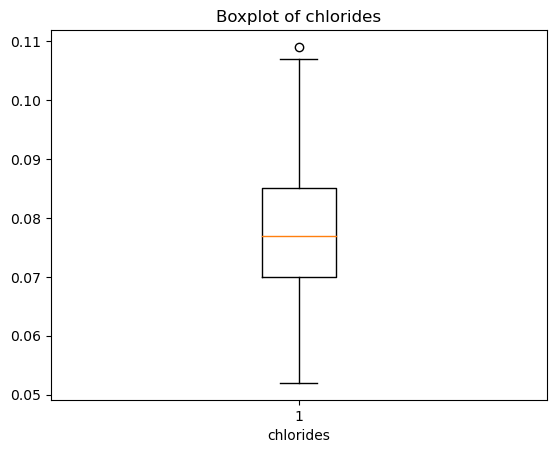

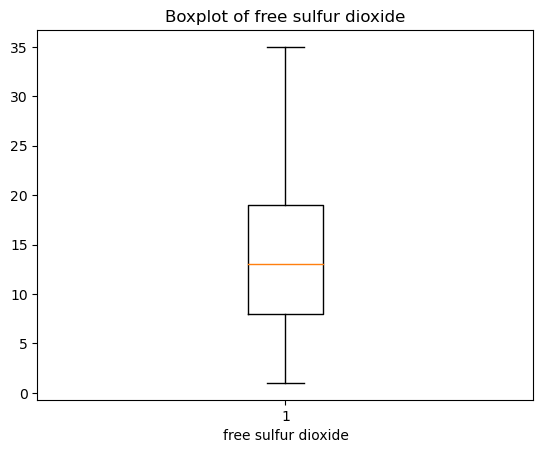

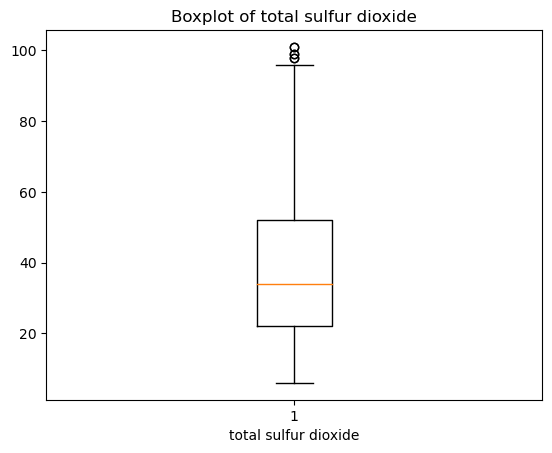

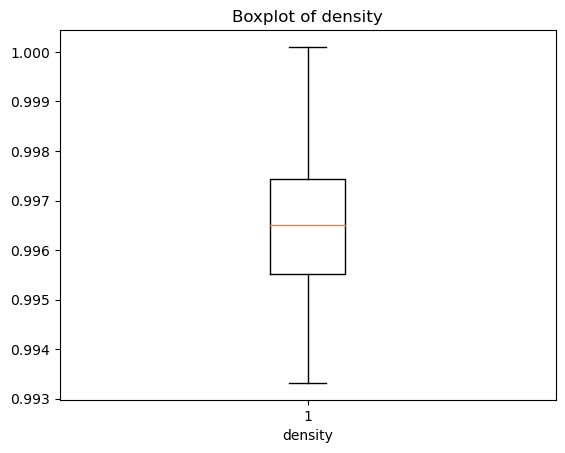

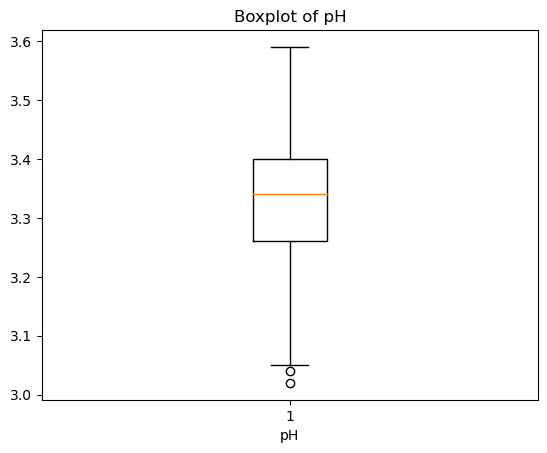

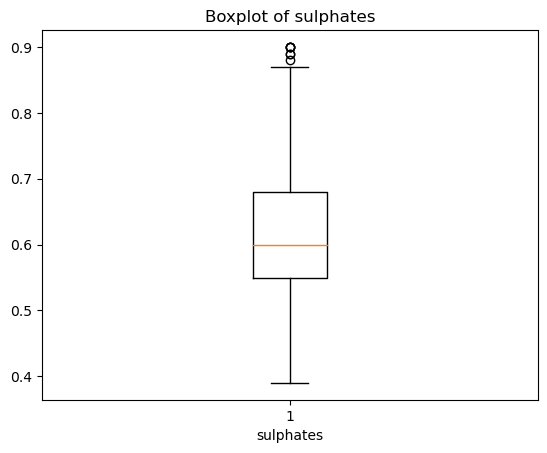

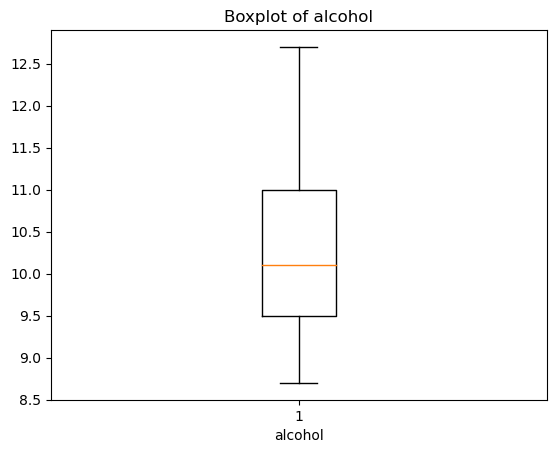

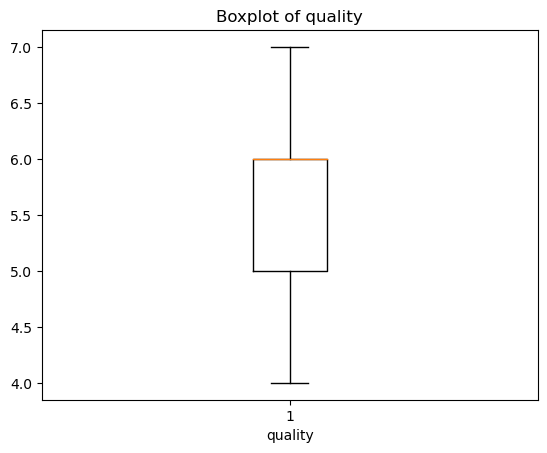

In [10]:
# DROP Outliers for all columns using IQR
def drop_outliers(df):
    df_new = pd.DataFrame()
    
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1 * IQR  # 1.5 and 2 didn't work; 1 worked the best for threshold
        upper_bound = q3 + 1 * IQR  # 1.5 and 2 didn't work; 1 worked the best for threshold
        
        # drop outliers
        df_new[col] = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
    
    return df_new
        
df_clean = drop_outliers(df)
df_clean = df_clean.dropna()
plt_boxplots(df_clean)

In [11]:
df_clean.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0


In [12]:
df_clean.shape

(633, 12)

Text(0.5, 1.0, 'Heatmap of Feature Correlation')

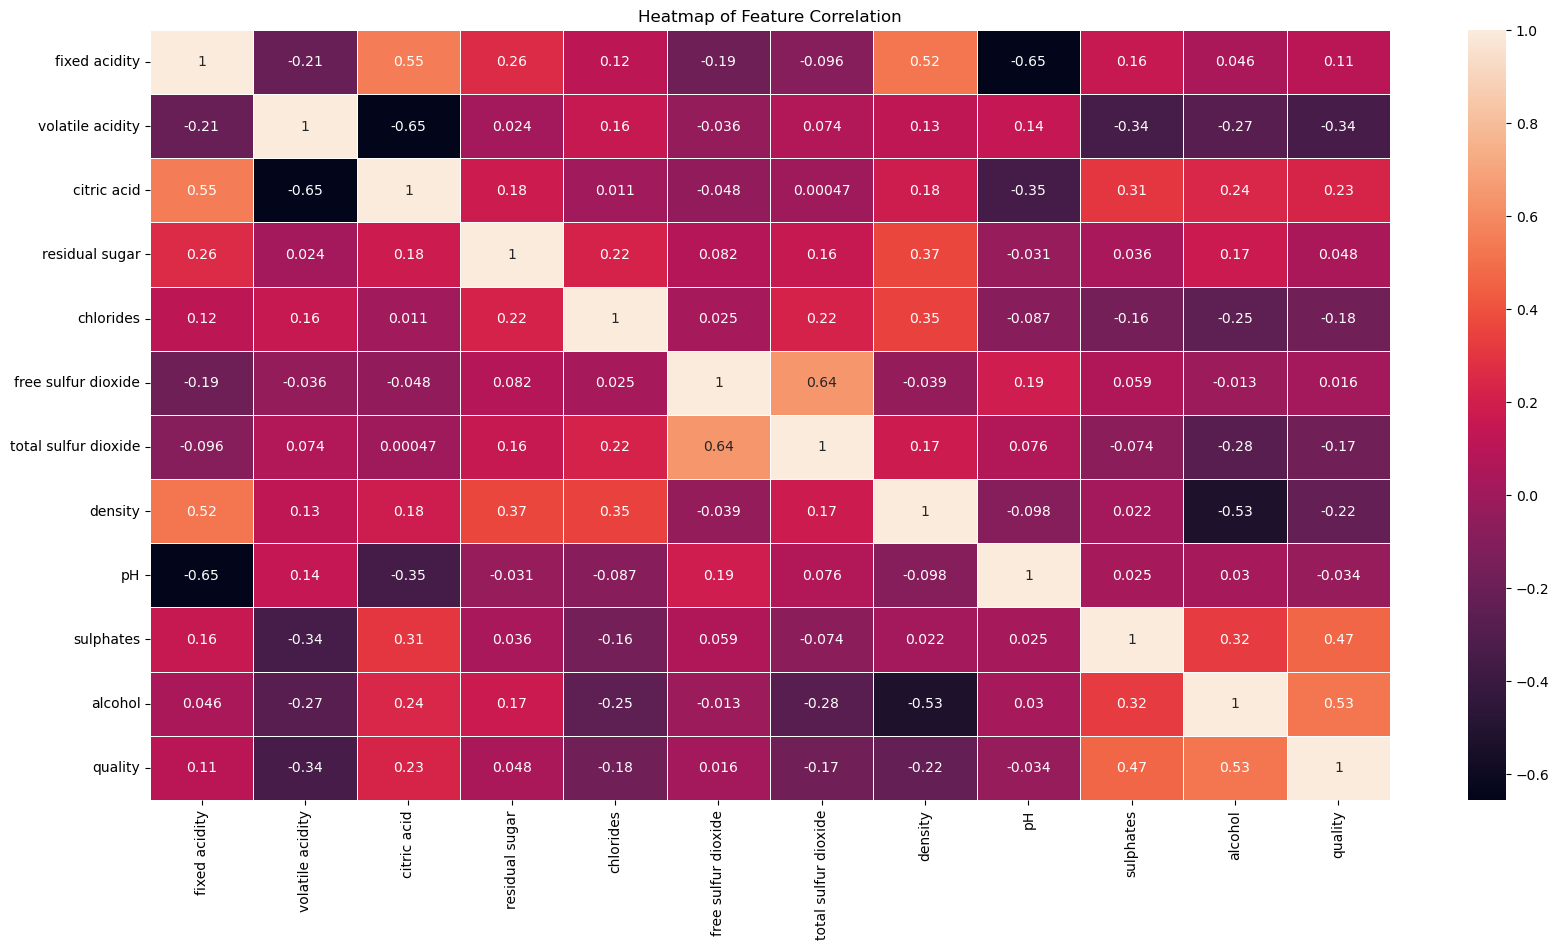

In [13]:
# heatmap to see the correlation of each variables
correlation = df_clean.corr()

plt.figure(figsize = (20, 10))
sns.heatmap(correlation, annot=True, linewidths=0.5)
plt.title('Heatmap of Feature Correlation')

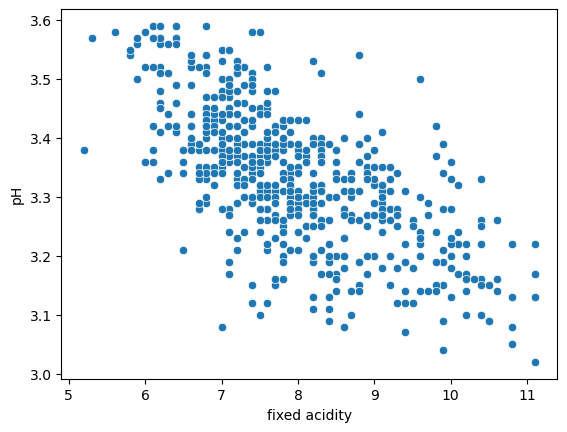

In [14]:
# scatter plot for density vs fixed acidity
sns.scatterplot(data = df_clean, y = 'pH', x = 'fixed acidity');

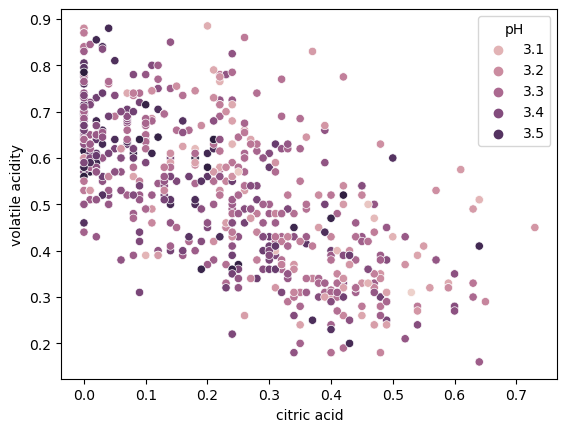

In [15]:
# scatter plot for volatile acidity vs citric acid
sns.scatterplot(data = df_clean, y = 'volatile acidity', x = 'citric acid', hue = 'pH');

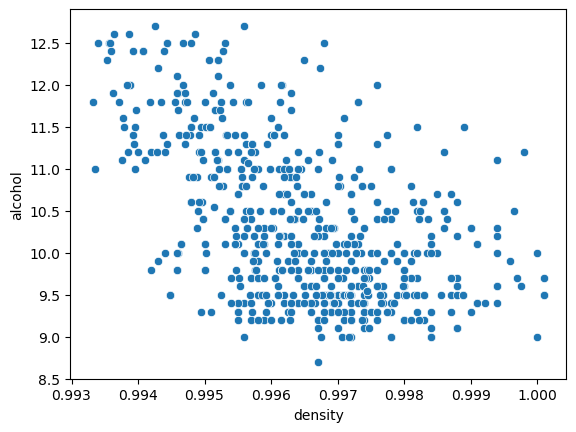

In [16]:
# scatter plot for density vs alcohol
sns.scatterplot(data = df_clean, y = 'alcohol', x = 'density');

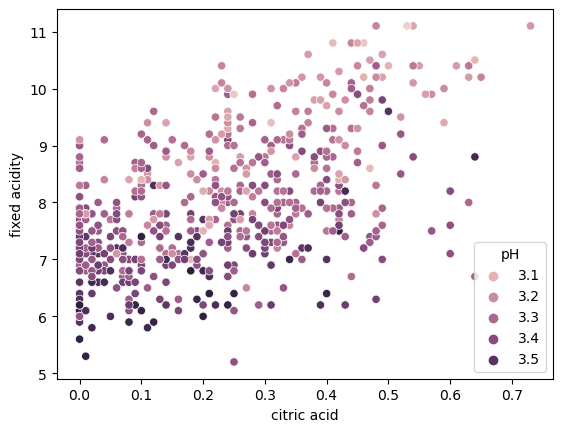

In [17]:
# scatter plot for citric acid vs fixed acidity
sns.scatterplot(data = df_clean, y = 'fixed acidity', x = 'citric acid', hue = 'pH');

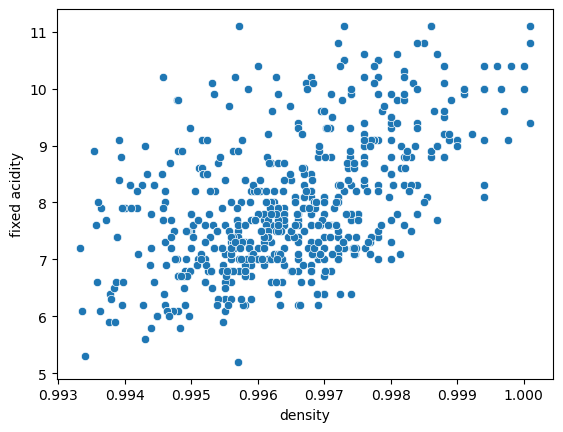

In [18]:
# scatter plot for density vs fixed acidity
sns.scatterplot(data = df_clean, y = 'fixed acidity', x = 'density');

### Heatmap and Scatterplot Observations:
**Positive correlations: helps me determine which features are strongly correlated with the target variable: `quality`:**
1. Alcohol, Quality = 0.53
2. Sulphates, Quality = 0.47
3. Citric Acid, Quality = 0.23 *(not that strong but better than the other values)*
4. Fixed Acidity, Quality = 0.11 *(not that strong but better than the other values)*


**Negative Correlations:**
1. Fixed Acidity, pH = -0.65
    - Fixed Acidity increases, pH decreases
    - pH increases, Fixed Acidity decreases
    - This relationship is a reflection of the acid-base chemistry: higher concentrations of acids (fixed acidity) lead to more Hydrogen ions and lower pH (high acidity), while lower concentrations of acids result in fewer Hydriogen ions and higher pH (lower acidity).
    
2. Citric Acid, Voltile Acidity = -0.65
    - Citric Acid increases, Voltile Acidity decreases
    - Voltile Acidity increases, Citric Acid decreases
    - Excessive levels of citric acid leads to sour or overly acidic taste
    - Excessive levels of voltile acidity leads to undesirable vinegar-like aromass and flavors
    - Wines with higher citric acid tend to have balanced acidity, inhibiting the development of volatile acidity
    
3. Alcohol, Density = -0.53
    - Density increases, Alcohol decreases
    - Density decreases, Alcohol increases
    - Higher Alcohol Content is associated with Lower Density
    - Wine with higher alcohol content and lower density may feel lighter and more 'ethereal'
    - Wine with lower alcohol content and higher desnity may feel more substantial and viscous
    - Alcohol is less dense than water and sugar, when yeast converts sugar into alcohol (during fermentation), alcohol content increases. Therefore, desnity decreases. 
    
    
    

**Other features with positive correlations and analyzing their scatterplot:**
1. Citric acid vs Fixed Acidity = 0.55
    - As fixed acidity increases then citric acid increases; vice versa
    - If pH levels increased then there was lower citric acid and fixed acidity
        - Lower pH = higher acidity
    - If pH levels decreased then there was a higher level of citric acid and fixed acidity
        - Higher pH = lower acidity
    - The positive relationship of citric acid and fixed acidity can be explained by the fact that they both contribute to the overall acidity of the wine. 
    - When pH levels increase (lower acidity) then there would be a decrease of citric acid and fixed acidity 
    - When pH levels decrease (higher acidity) then there would be a increase of citric acid and fixed acidity
    - Lower pH (high acid) can help preserve citric acid and other acids in the wine
    

2. Density vs Fixed Acidity = 0.52
    - As density increases then fixed acidity increases; vice versa
    - As the fixed acidity of wine increases (i.e., higher concentration of acids), more dissolved solids are present in the wine, which increases its density
    - The positive correlation reflects the influence of dissolved acids on the mass of the wine. Higher concentrations of fixed acids lead to increased density due to the greater presence of dissolved solids in the liquid. 
    
    
3. Free Sulfur Dioxide vs Total Sulfur Dioxide = 0.64
    - As free sulfur dioxide increases, total sulfur dioxide increases; vice versa
    - Chemical equilibrium: SO2 (total) = SO2 (free) + SO2 (bound)
    - So, if SO2 (free) increases, then SO2 (total) would increase as well. 



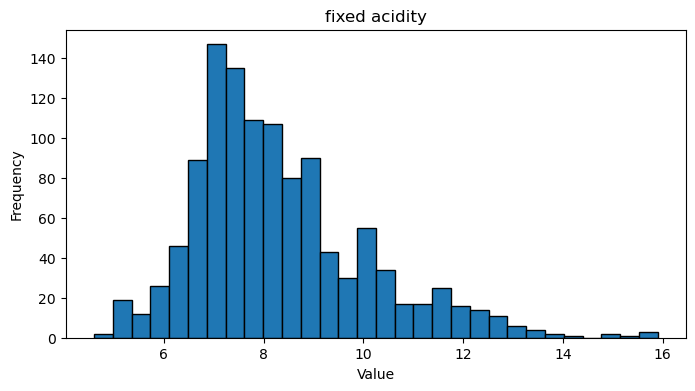

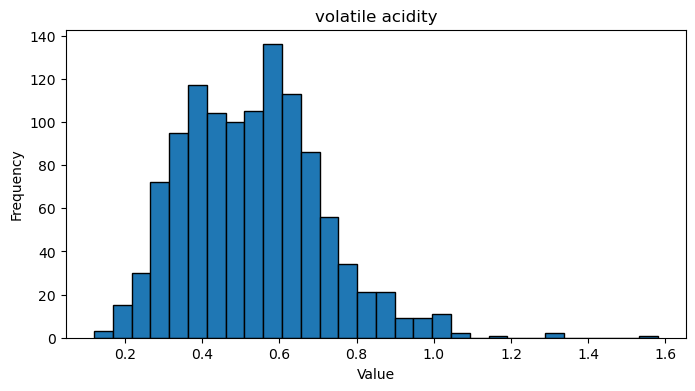

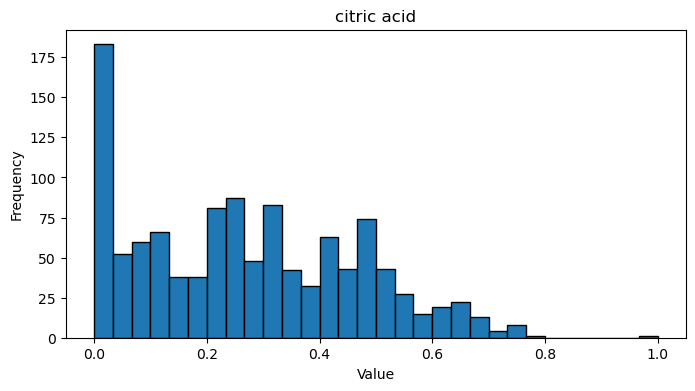

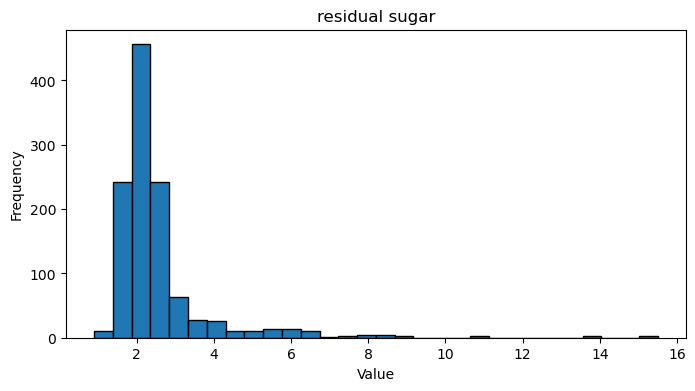

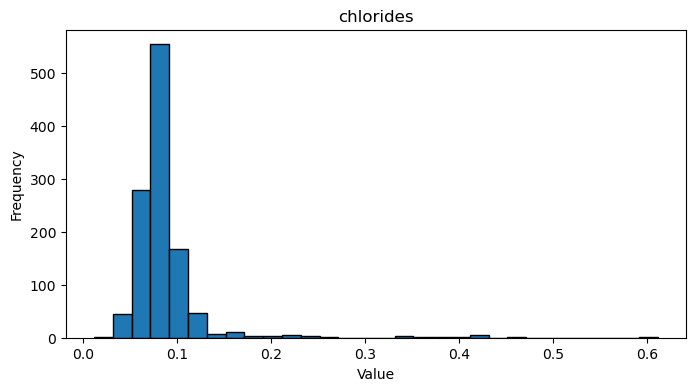

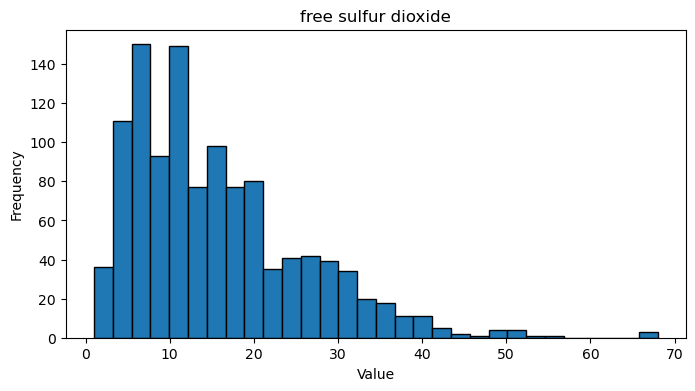

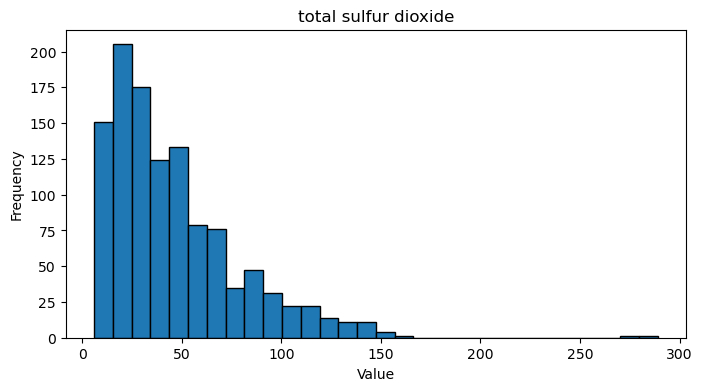

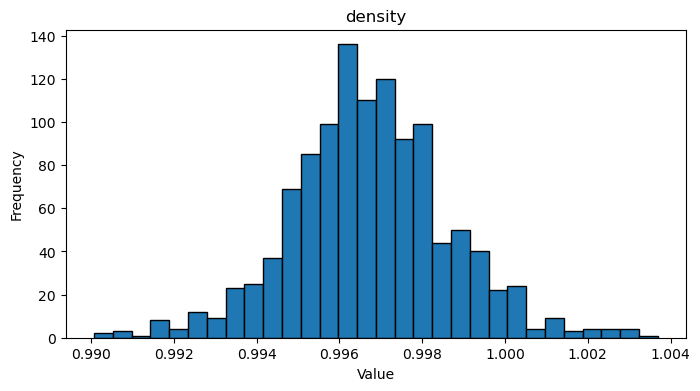

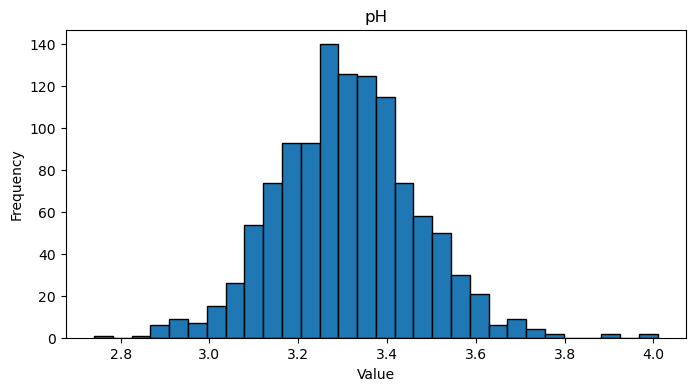

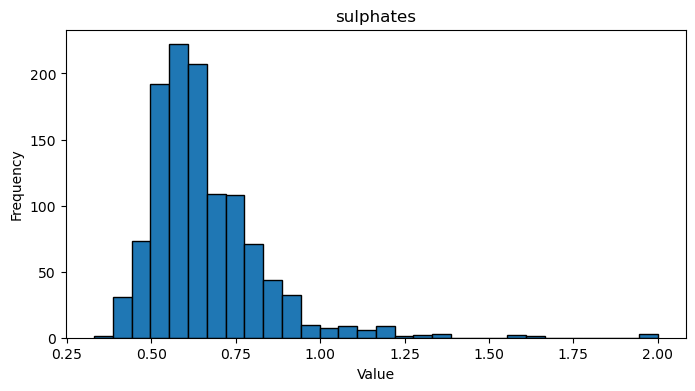

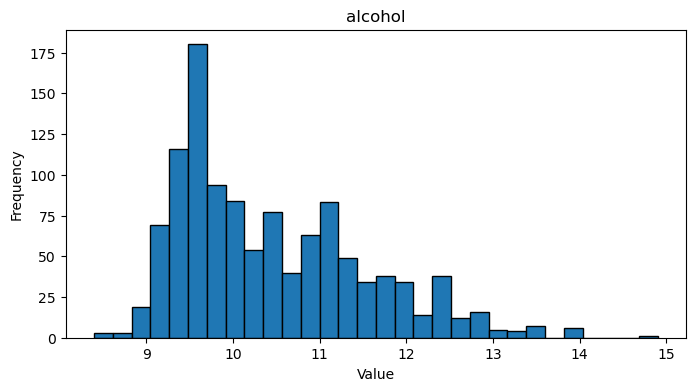

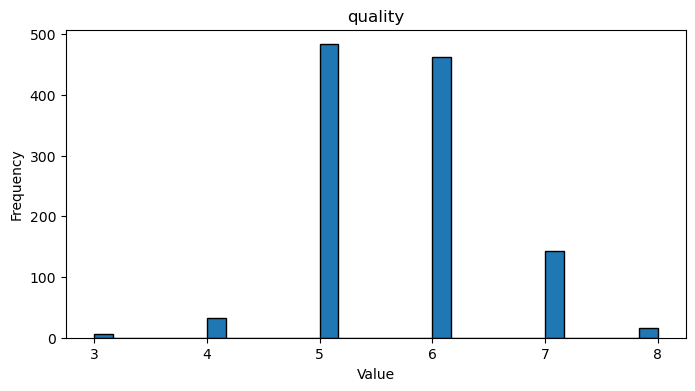

In [22]:
# Histogram to visualize the distribution of each column
for col in df_clean.columns:
    plt.figure(figsize = (8, 4))
    plt.hist(df[col], bins = 30, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

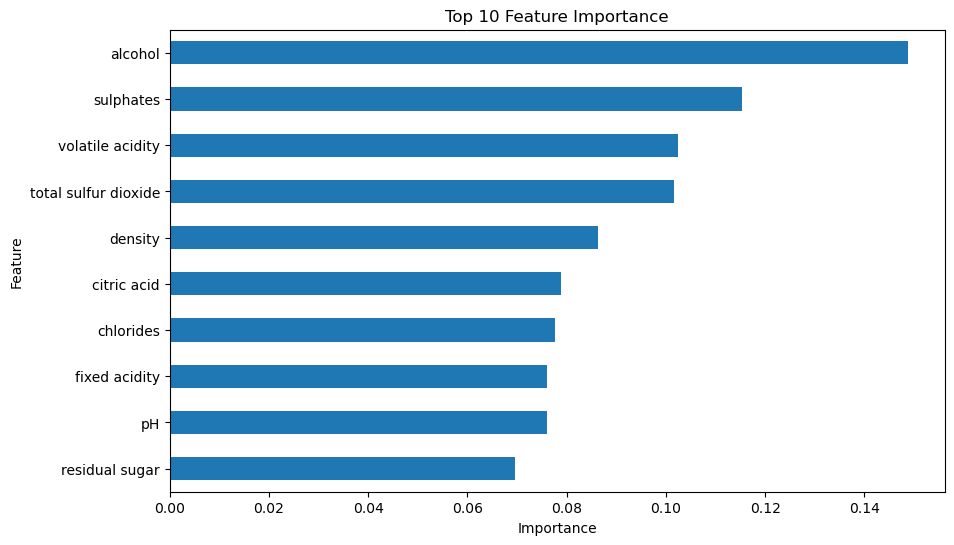

In [30]:
# feature importance using RF
X = df.drop(['quality'], axis=1)
y = df['quality']

rf = RandomForestClassifier()
rf.fit(X, y)

# Plot feature importance
feat_importances = pd.Series(rf.feature_importances_, index = X.columns)
feat_importances_sorted = feat_importances.nlargest(10).sort_values(ascending = True)


plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Why is there a difference between RF Feature Importance and Correlation Matrix

RF calculates feature importance based on how much feature contributes to reducing the impurity in DT within RF ensemble. RF can capture complex, non-linear relationships between features and target variables. 

Feature importance in a random forest considers the overall contribution of each feature to the model's predictive performance. It doesn't necessarily align with the strength of linear correlations with the target.

In [19]:
# export the cleaned dataset
# df_clean.to_csv("wine quality (clean).csv", index = False)